# 1. Introduction

## 1.1 Dataset selection

In this project, I am going to select a dataset for data investigation. The dataset I selected was the Titanic survial data containing the details of the subset of passengers who boarded on the infamous ferry, the Titanic. I wanted to see if there were certain factors that allowed a person to survive over another.

## 1.2 Questions for data analysis

The big question was of course, which type of people tend to survive most (gender, age, class etc.). However, I also wanted to look at the multiple characteristics at once too. These are the questions I want to answer through this analysis:

1. Which gender survived the most? 
    - Is that trend also apparent across all classes?
2. Which age group tend to survive the most?
    - Is that the same across all genders?
3. Which boarding status (alone or with company) tend to survive the most?

# 2. Data Analysis

## 2.1 Data wrangling

First I imported some libraries for my analysis and printed the first few lines of the dataframe.

In [77]:
#import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

data = pd.read_csv("titanic-data.csv")
#see what the dataset looks like
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


I can see that there are 12 columns for this dataset, but I can't really say anything about the data with only a small subset of the whole dataframe. So let's conduct some basic summarization.

In [78]:
#shape of dataframe(row,column)
print(data.shape)
print("\n")
#total values for each column and types of data
print(data.info())
print("\n")
#descriptive summary of quantitative data columns
data.describe()

(891, 12)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None




/Users/jk6653284/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


I can see that we have some missing values for the "Age" column, "Cabin" column, and "Embarked" column.
Now I'm not that interested in the "Cabin" column for my survival analysis, so I can just drop that column altogether. "Embarked" is also not too big of a problem, because there are only 2 missing values.

But the age column is a problem because I do want to incorporate age in my analysis, and there are 177 missing values, which is about 20% of the total individuals.

I can either create a separate dataframe excluding all rows with missing age values, or replace the NaN values with a value that will not affect the data too much. In the end I created a separate dataframe with all rows with null age values excluded.

In [79]:
missing_ages = data[data["Age"].isnull()]
missing_ages.describe()

/Users/jk6653284/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,177.000000,177.000000,177.000000,0.0,177.000000,177.000000,177.000000
mean,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567
std,250.552901,0.456787,0.763216,NaN,1.626316,0.534145,31.874608
min,6.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000
25%,230.000000,0.000000,3.000000,NaN,0.000000,0.000000,7.750000
50%,452.000000,0.000000,3.000000,NaN,0.000000,0.000000,8.050000
75%,634.000000,1.000000,3.000000,NaN,0.000000,0.000000,24.150000
max,889.000000,1.000000,3.000000,NaN,8.000000,2.000000,227.525000


In [80]:
#create a new dataframe "all_age" with all rows with
#missing age values dropped
all_age = data.dropna(subset=["Age"])
print(all_age.info())
all_age.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB
None


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


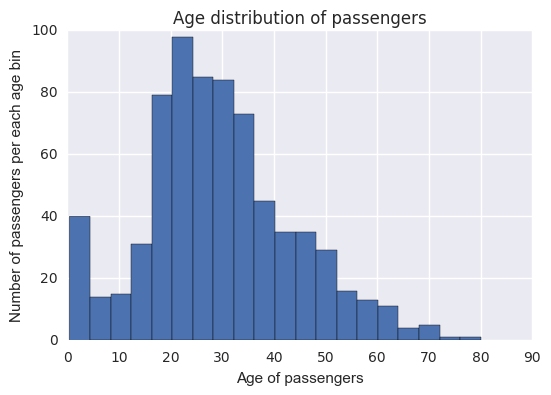

In [81]:
#age distribution of passengers, with NaN age values removed
plt.hist(all_age["Age"],bins=20)
plt.ylabel("Number of passengers per each age bin")
plt.xlabel("Age of passengers")
plt.title("Age distribution of passengers")
plt.show()

While for the purpose of age analysis dropping all the NaN age value would be more accurate, as I don't want to drop 20% of the data for other analysis, I will only use the "all_age" dataframe for age related analysis.

## 2.2 Gender survival

I wanted to start by looking at how survival rate differ among the two genders.

male      577
female    314
Name: Sex, dtype: int64


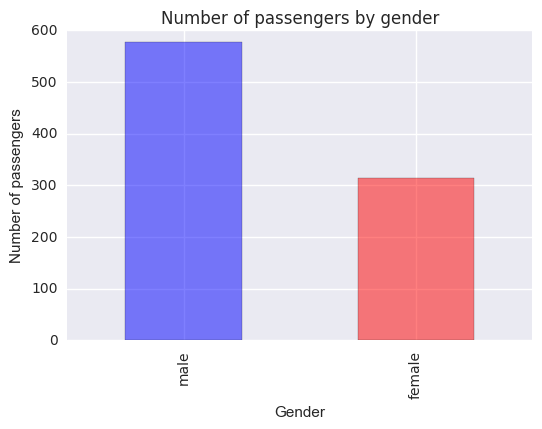

In [82]:
#this is to ensure that there are only two kind of values for "Sex"
print(data["Sex"].value_counts())

#plot number of passengers by each gender
data["Sex"].value_counts().plot(kind="bar",color=["b","r"],alpha=0.5)
plt.title("Number of passengers by gender")
plt.xlabel("Gender")
plt.ylabel("Number of passengers")

<b>There are a lot more male passengers than female passengers onboard (64.76% male and 35.24% female)</b>. Would this be the same for the survival rate?

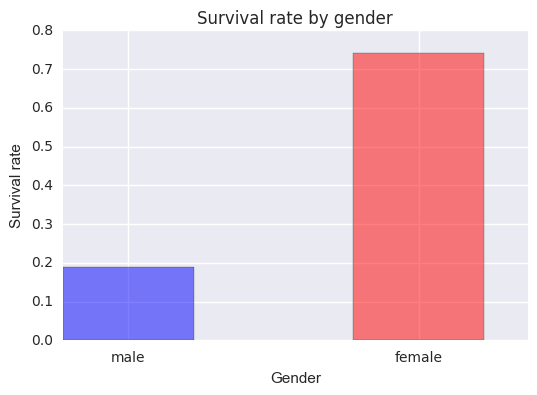

In [83]:
#calculate mean survival rate for each gender
female_survive = data[data["Sex"]=="female"]["Survived"].mean()
male_survive = data[data["Sex"]=="male"]["Survived"].mean()

#plot bar graph to compare the two
#reference: http://stackoverflow.com/questions/11597785/setting-spacing-between-grouped-bar-plots-in-matplotlib
ind = np.arange(2)
margin = 0.05
width = (1.-2.*margin) / 2

plt.bar(ind,[male_survive,female_survive],width=width,color=["b","r"],alpha=0.5)
plt.xticks(ind+(width/2),["male","female"])
plt.title("Survival rate by gender")
plt.xlabel("Gender")
plt.ylabel("Survival rate")
plt.show()

It's quite obvious from the graph that <b>a higher percentage of female passengers survived than the male passengers did</b>. But I was curious if this observation was consistent among all 3 classes.

In [84]:
#reference: http://chrisalbon.com/python/matplotlib_grouped_bar_plot.html
cands = data[["Sex","Pclass","Survived"]]
male = cands[cands["Sex"]=="male"]
female = cands[cands["Sex"]=="female"]
male[male["Pclass"]==1]["Survived"].mean()

male_sur = []
female_sur = []
for i in np.arange(3):
    male_sur.append(male[male["Pclass"]==(i+1)]["Survived"].mean())
    female_sur.append(female[female["Pclass"]==(i+1)]["Survived"].mean())

survival_data = {"class": [1,2,3],
                "male_survival": male_sur,
                "female_survival": female_sur}
sur_df = pd.DataFrame(survival_data,columns=["class","female_survival","male_survival"])
sur_df

,class,female_survival,male_survival
0,1,0.968085,0.368852
1,2,0.921053,0.157407
2,3,0.500000,0.135447


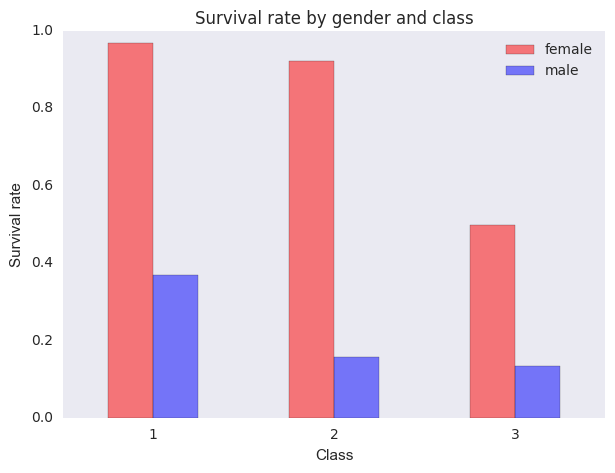

In [85]:
pos = list(range(len(sur_df["class"])))
width = 0.25

fig, ax = plt.subplots(figsize=(7,5))

plt.bar(pos,sur_df["female_survival"],width,alpha=0.5,color="r",label="female")
plt.bar([p + width for p in pos],sur_df["male_survival"],width,alpha=0.5,color="b",label="male")

ax.set_ylabel("Survival rate")
ax.set_xlabel("Class")
ax.set_xticks([p+1 *width for p in pos])
ax.set_xticklabels(sur_df["class"])
ax.set_title("Survival rate by gender and class")
plt.xlim(min(pos)-width,max(pos)+width*3)
plt.legend(loc='upper right')
plt.grid()
plt.show()

From this graph we can see that while the survival rate for female is much higher for all classes, <b>there is a striking drop in the rate for females in the 3rd class, indicating that class difference is also apparent in survival</b>. This is further confirmed by the fact that the <b>survival rates for males in 2nd and 3rd class are less than half of that of males in the 1st class</b>.

To prove that class also mattered, I examined only the class factor too.

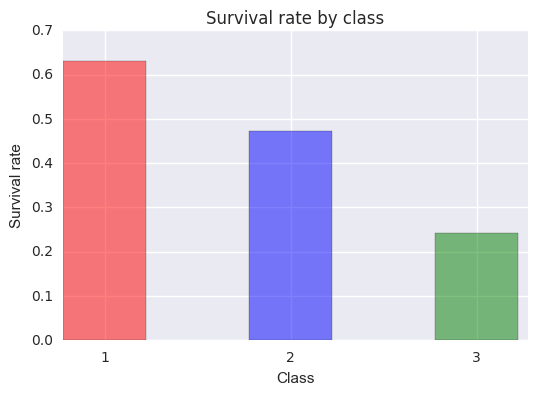

In [86]:
fc_survive = data[data["Pclass"]==1]["Survived"].mean()
sc_survive = data[data["Pclass"]==2]["Survived"].mean()
tc_survive = data[data["Pclass"]==3]["Survived"].mean()

#plot bar graph to compare the two
#reference: http://stackoverflow.com/questions/11597785/setting-spacing-between-grouped-bar-plots-in-matplotlib
ind = np.arange(3)
margin = 0.05
width = (1.-2.*margin) / 2

plt.bar(ind,[fc_survive,sc_survive,tc_survive],
        width=width,color=["r","b","g"],alpha=0.5)
plt.xticks(ind+(width/2),["1","2","3"])
plt.ylabel("Survival rate")
plt.xlabel("Class")
plt.title("Survival rate by class")
plt.show()

And surely, <b>the survival rate decreased in the order of classes</b>. Notice that the rate difference is more evenly decreased than the class survival rate for each gender. The much higher female survival rate possibly pulled up the very poor male survival rate.

## 2.3 Age survival

Next, I wanted to see the age distribution of the passengers. Unlike the gender and the class feature, age is a continuous variable, meaning that it really doesn't make sense to find the survival rate for age. So I decided to just use a frequency table, stacking not survived on survived to compare the values on a single graph.

reference = http://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html

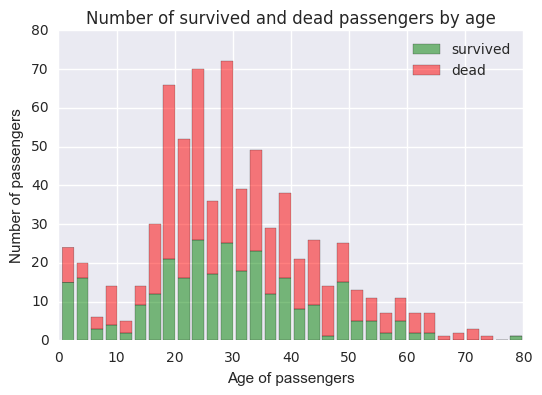

In [87]:
plt.hist([all_age[all_age["Survived"]==1]["Age"],all_age[all_age["Survived"]==0]["Age"]],
         stacked=True,color=["g","r"],bins=32,
         label=["survived","dead"],alpha=0.5)
plt.legend(loc="upper right")
plt.xlabel("Age of passengers")
plt.ylabel("Number of passengers")
plt.title("Number of survived and dead passengers by age")
plt.show()

Now I thought this was confusing, because although I can guessowrk that the bars with more green area has a higher survival rate, it's not really useful for comparing. Also, I wasn't really sure what the right bin number was.

Upon further research, I found out that a kde plot of survived data by age would be appropriate to smooth out the variances. 


reference: http://darkpgmr.tistory.com/147

The reference is in Korean, but the basic idea is that because histograms tend divide data in an arbitary bin range and therefore the shape differs a whole lot depending on the bin size, for density estimation purposes, it is better to accompany a kde plot which tends to smoothen out histogram.

I imported the seaborn library for this graph, because seaborn has a default kde graph drawn on any histogram.

/Users/jk6653284/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


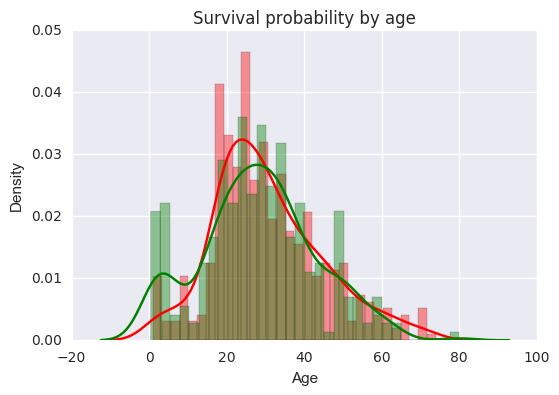

In [88]:
#import seaborn library and draw the histogram with the kde graph
import seaborn as sns
sns.distplot(all_age[all_age["Survived"]==0]["Age"],bins=32,color="r")
sns.distplot(all_age[all_age["Survived"]==1]["Age"],bins=32,color="g")
plt.ylabel("Density")
plt.title("Survival probability by age")

Although I can see the kde graph with this result, I felt that the histogram was getting in the way a bit too much. So I've decided to get rid of the histogram and only display the kde.

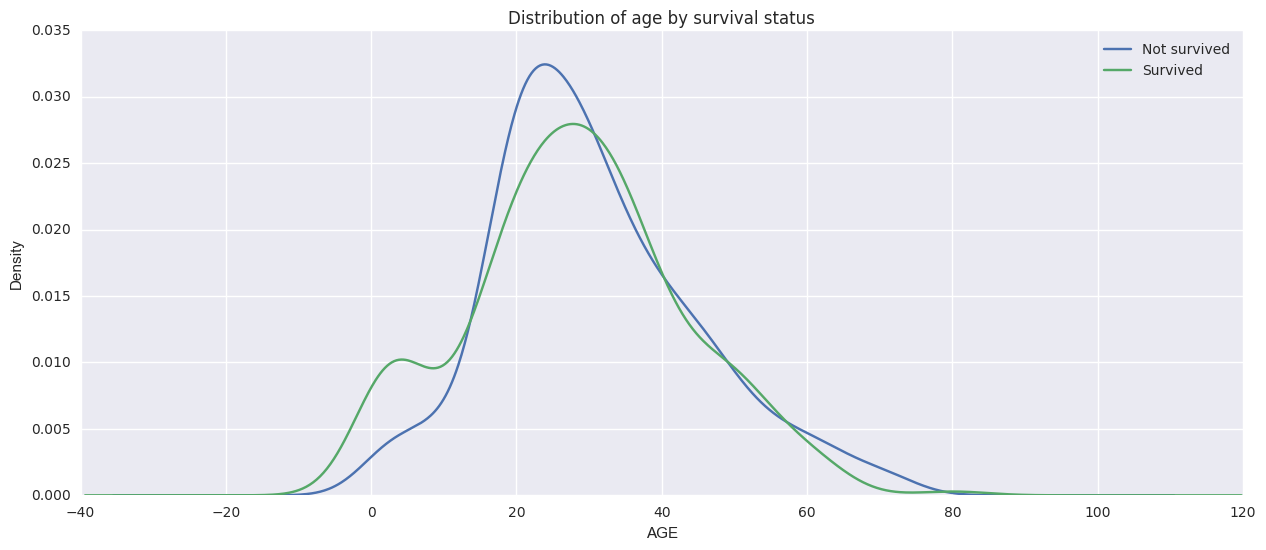

In [89]:
'''compare kde plots of age distribution'''
fig = plt.figure(figsize=(15,6))
all_age[all_age["Survived"]==0]["Age"].plot(kind="density",label="Not survived")
all_age[all_age["Survived"]==1]["Age"].plot(kind="density",label="Survived")
plt.legend()
plt.title("Distribution of age by survival status")
plt.xlabel("AGE")

This shows that <b>those under the age of 15 were more likely to survive</b>. Furthermore, <b>those of age between around 17 to 25 were more likely to not survive</b> from the accident.

Again, I wanted to know if that trend is consistent for different situations. For example, would we still see the same trend for each gender? To do this, I would have to group the data by age group and gender, meaning that again, I am facing the same bin problem.

From the graph above, if the age bins were divided by 10 years, then people of age 12 would be in the same group as people of age 18. Because I already know that this age group between 10-19 has a stricking difference between survival rate (as can be said for age 20-40), I wanted to divide the group into more precise bin, perhaps about 5 years span.

reference = https://github.com/ghunt03/DAP02-Investigate-a-dataset/blob/master/Titanic%20Dataset%20Investigation.ipynb

In [90]:
age_groups = ['<5','5-9','10-14','15-19','20-24','25-29','30-34',
              '35-39','40-44','45-49','50-54','55-59','60-64',
             '65-69','70-74','74<']
data["age_group"] = pd.cut(data["Age"], range(0,81,5),
                           right = False, labels = age_groups)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-24
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,25-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35-39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35-39


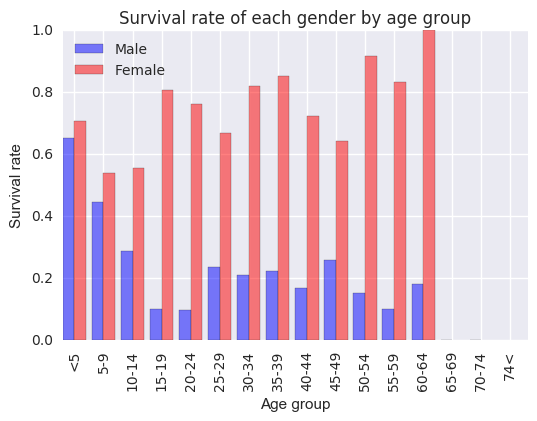

In [91]:
male_age = data[data["Sex"]=="male"].groupby("age_group")["Survived"].mean()
female_age = data[data["Sex"]=="female"].groupby("age_group")["Survived"].mean()

fig,ax = plt.subplots()
plt_pos = np.arange(len(age_groups))

ax.bar(plt_pos, male_age, width=0.4, label = "Male", 
       color="b",alpha=0.5)
ax.bar(plt_pos+0.4, female_age, width=0.4, label = "Female",
      color="r", alpha=0.5)
plt.xticks(plt_pos+0.4, age_groups,rotation="vertical")
plt.legend(loc='best')
plt.ylabel("Survival rate")
plt.xlabel("Age group")
plt.title("Survival rate of each gender by age group")
plt.show()

While it is obvious that <b>females were more likely to survive in all ages groups</b>,it is easy to see that <b>the difference is much smaller in younger age groups (0-9)</b>. There is also a very interesting age group where all the female passengers survived (age 60-64).

In [92]:
#class value count of the highest survivng gender/age group
highest_female = data[data["age_group"]=="60-64"][data["Sex"]=="female"][data["Survived"]==1]
#class value count of the lowest surviving gender/age group
lowest_male = data[data["age_group"]=="20-24"][data["Sex"]=="male"][data["Survived"]==0]

print(highest_female["Pclass"].value_counts())
print(lowest_male["Pclass"].value_counts())

1    3
3    1
Name: Pclass, dtype: int64
3    49
2    12
1     4
Name: Pclass, dtype: int64


/Users/jk6653284/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/jk6653284/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Out of curiosity, I looked into the class distribution of the age/sex group with the highest survival rate (female 60-64 100% survival rate) and the lowest survival rate (male 20-24 about 10%). Not surprisingly, Most of the people who survived in the highest survival rate group were 1st class passengers(75%), while most in the lowest group were 3rd class(75%). 

## 2.4 Boarding status survival

I also wanted to see whether being alone or with somebody showed any difference in the survival rate. My first attempt was to split the last name from the "Name" column and groupby all the same last name to see the survival rate for each family, but I realized in the middle of the process that some people shared the same family name despite not being related to one another. In the end, I decided to settle down for the simple alone vs with company comparison.

In [93]:
#create a boarding status column using the "SibSp" and "Parch" column
data["alone_status"] = data["SibSp"] + data["Parch"]
data.loc[data["alone_status"]>0,"alone_status"] = "with company"
data.loc[data["alone_status"]==0, "alone_status"] = "alone"
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,alone_status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-24,with company
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35-39,with company
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,25-29,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35-39,with company
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35-39,alone


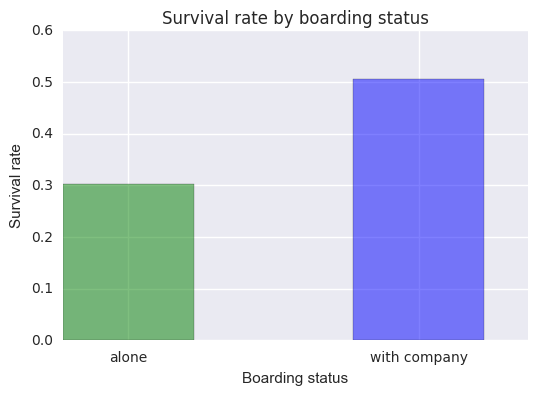

In [94]:
#calculate mean survival rate by boarding status
alone_survive = data[data["alone_status"]=="alone"]["Survived"].mean()
not_alone_survive = data[data["alone_status"]=="with company"]["Survived"].mean()

#plot bar graph to compare the two
ind = np.arange(2)
margin = 0.05
width = (1. - 2.*margin) / 2

plt.bar(ind, [alone_survive, not_alone_survive], width = width,
        color = ["g","b"], alpha = 0.5)
plt.xticks(ind+(width/2), ["alone","with company"])
plt.xlabel("Boarding status")
plt.ylabel("Survival rate")
plt.title("Survival rate by boarding status")
plt.show()

From the graph, it's clear to see that people with company (whether it be parent, child, sibling, or spouse) had a higher survival rate than those who boarded alone. From the age analysis before, I can only guess that one of the reason may be that young children under the age 15 (who has the highest survival rate among all age groups) usually don't board alone. Let's just quickly check the boarding status of the children to confrim that.

In [113]:
#calculate alone_status distribution of passengers under the age 15
data.loc[data["Age"] <= 15, "alone_status"].value_counts()

with company    77
alone            6
Name: alone_status, dtype: int64

As expected, about 93% of the children under the age 15 had a company of some sort. This would have surely boosted the mean survival value of the "with company". To check that even further, I made a boxplot that shows the distribution of age in quartile ranges.

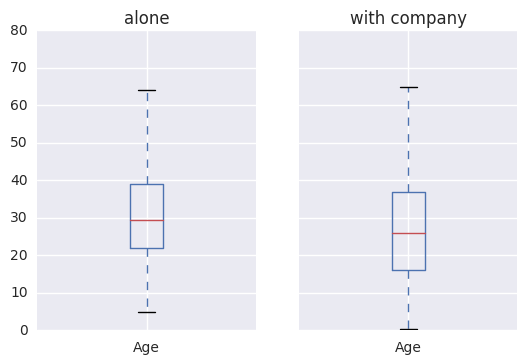

In [115]:
#create a boxplot showing the age distribution by boarding status
data.groupby("alone_status").boxplot(column="Age", return_type="axes")
plt.show()

We can see that the <b>inner 50% of the "alone" group was between age 21 to 39, which, again, is the group with the highest death rate among the age groups</b>. On the other hand, the with company has a wider range, and surely the higher survival rate of the younger passengers would've boosted the survival rate.

# 3. Conclusion

## 3.1 Answering the questions

Having gone through the analysis, I think I can answer the questions I wanted to answer.

**Which gender survived the most?**
While female passengers only accounted for about 35% of the total passengers, 75% of them survived, compared to less than 20% in the case of male passengers. Furthermore, not only did female passengers tend to survive more than male passengers as a whole, but they did so even for individual class comparisons. It is also apparent that the upper class females generally survived more(98%), pulling the rather poor survival rate of 3rd class females(50%). 


**Which age group tend to survive the most?**
Young passengers under the age of 15 tend to have the highest survival rate compared to all other age groups, while those between age 17 to 25 recorded the worst survival rate. Continuing the trend from question 1, female passengers of all age groups had higher survival rates than male passnegers of the same groups, but while the difference in gender is quite small in the younger age group (5% for age 0-5), it is shockingly large in older age groups (about 80% for age 60-64). Women and children were indeed saved first in the accident.


**Which boarding status (alone or with company) tend to survive the most?**
Those who had at least one company on board (50%) had higher survival rates than those who boarded alone (30%). Presumably, this is linked to the "Children first" conclusion derived from previous question, as children would have most likely traveled with an adult. 

## 3.2 Limitations: Analysis

Limitations can be divided into two parts.

The first is the limitation of analysis.
This is an analysis on the result data only, and I wasn't able to conduct any analysis of how likely a person was to survive given a certain characteristic.

For example, I could easily conclude there were more female survivors than males, and many of the younger passengers survived, but I am not able to answer how likely a passenger was to survive given that she was age 5. That would require some machine learning and bayesian probability knowledge, which I lack at the moment.

Another limitation is that while I did analyze multiple variables at once, I wasn't able to conclude how related were these variables. This was especially challenging because I was interested in the "Survived" information in relation to other variables, and the "Survived" variable only had two values, making it hard to plot on a scatter plot. Some were not even a linear relationship (e.g. age and survival rate), so it was hard to perform a regression analysis. It would be interesting to explore this data further in the future.

## 3.3 Limitations: Data

The second type of limitation was the data itself.

This data was a subset of the whole titanic passenger data (40%). I am not sure if this was a random selection sample from the whole data, but there is always a possibility that when we analyze the whole dataset, the trends may differ.

Furthermore, many data was missing. The most striking of those was the cabin data and the age data. Early on while wrangling the data, I put all the rows with missing age in a missing_age dataframe.


In [ ]:
missing_ages.describe()

Even from this simply summary, we see a very serious problem that <b>the majority of the missing data is from the 3rd class</b>, which I have found out had the highest mortality rate among all classes. Surely enough, the total survival rate of this subset is 29%, which is much lower than both the data(38%) dataframe and all_age(41%) dataframe.

Knowing this, I must be cautious when dealing with missing values, as simply excluding them for analysis purpose may possibly lead to a very biased data, and thus a biased analysis.

# 4. References

* http://stackoverflow.com/questions/11597785/setting-spacing-between-grouped-bar-plots-in-matplotlib
* http://chrisalbon.com/python/matplotlib_grouped_bar_plot.html
* http://stackoverflow.com/questions/11597785/setting-spacing-between-grouped-bar-plots-in-matplotlib
* http://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html
* http://darkpgmr.tistory.com/147
* https://github.com/ghunt03/DAP02-Investigate-a-dataset/blob/master/Titanic%20Dataset%20Investigation.ipynb

In [1]:
import pandoc